# Analisis Exploratorio: SF Bay Area Bike Share

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.tools.plotting import scatter_matrix

Creamos los dataframes

In [6]:
weather = pd.read_csv('/home/alejandra/tpdatos/weather.csv', low_memory=False)
trips = pd.read_csv('/home/alejandra/tpdatos/trip.csv', low_memory=False)
stations = pd.read_csv('/home/alejandra/tpdatos/station.csv', low_memory=False)
lunes, martes, miercoles, jueves, viernes, sabado, domingo = 0,1,2,3,4,5,6
dias = ["lunes", "martes", "miercoles", "jueves", "viernes", "sabado", "domingo"]
meses = ['Enero', 'Febrero', 'Marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre',
              'noviembre', 'diciembre']

Preparamos el dataframe de trips

In [11]:
trips["date"] = pd.to_datetime(trips.start_date, format='%Y/%m/%d %H:%M')
trips["month"] = trips["date"].apply(lambda x: x.month)
trips["day"] = trips["date"].apply(lambda x: x.day)
trips['weekday'] = trips['date'].apply(lambda x: x.weekday())
trips["hour"] = trips["date"].apply(lambda x: x.hour)
trips["year"] = trips["date"].apply(lambda x: x.year)
trips["DATE"] = pd.to_datetime(trips[['year', 'month', 'day']], yearfirst=True)
trips["trips"] = trips["day"].apply(lambda x: 1)
trips["recorrido"] = trips["start_station_name"] + " to " + trips["end_station_name"]
trips.start_date = pd.to_datetime(trips.start_date)
trips.start_date = trips.start_date.apply(lambda x: x.date())

## Analizando el set de datos de los viajes

Grafico de barras: cantidad de viajes en cada mes

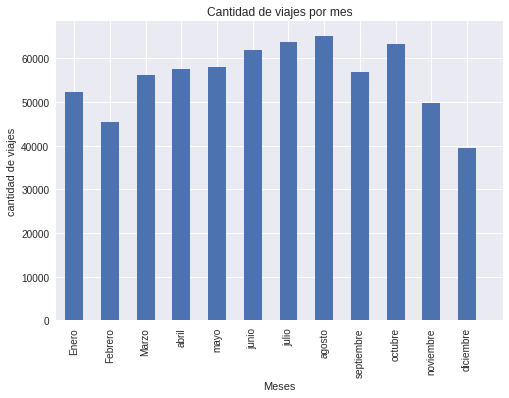

In [13]:
labels = meses
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
trips_month = trips["month"].value_counts(sort=False)
barras = trips_month.plot(kind="bar")
barras.set(title = "Cantidad de viajes por mes", xlabel="Meses", ylabel="cantidad de viajes")
plt.xticks(index,labels)
plt.show()

Grafico de barras: cantidad de viajes por dia de semana

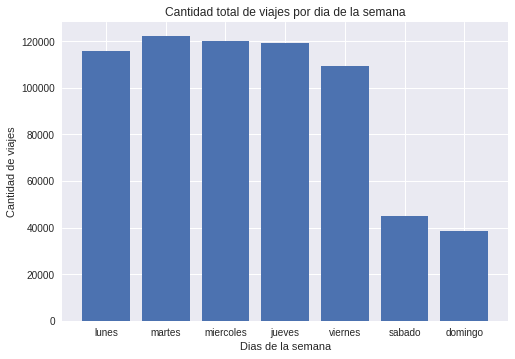

In [14]:
week = [0, 0, 0, 0, 0, 0, 0]
for day in trips["date"]:
    week[day.weekday()] += 1
index = [0, 1, 2, 3, 4, 5, 6]
labels = dias
plt.title("Cantidad total de viajes por dia de la semana")
plt.xlabel("Dias de la semana")
plt.ylabel('Cantidad de viajes')
plt.bar(index, week, align="center")
plt.xticks(index, labels)
plt.show()


Grafico de barras: cantidad de viajes por hora

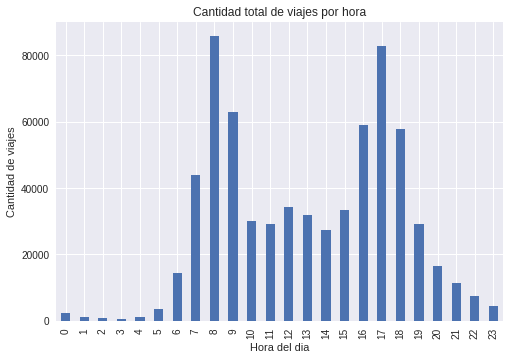

In [15]:
tripsHora = trips.groupby("hour")
tripsHora.count()["start_date"].plot(kind="bar")
plt.title("Cantidad total de viajes por hora")
plt.xlabel("Hora del dia")
plt.ylabel('Cantidad de viajes')
plt.show()

Grafico Boxplot: cantidad de viajes por dia de semana

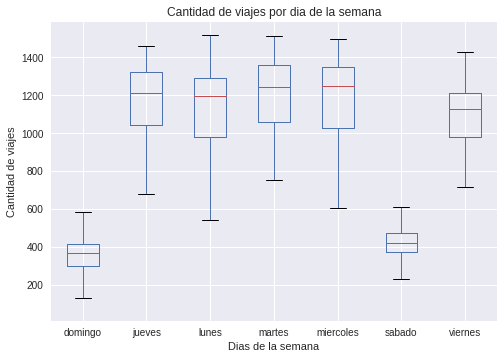

In [17]:
aux = {}
c = 0
for dia in dias:
    aux[dia] = trips[trips['weekday'] == c ].groupby('DATE').aggregate(sum).reset_index()['trips'][:104]
    c += 1
aux = pd.DataFrame.from_dict(aux, orient='columns')
aux.plot.box()
plt.title('Cantidad de viajes por dia de la semana')
plt.xlabel('Dias de la semana')
plt.ylabel('Cantidad de viajes')
plt.show()

Grafico Boxplot: cantidad de viajes por hora del dia

/home/alejandra/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


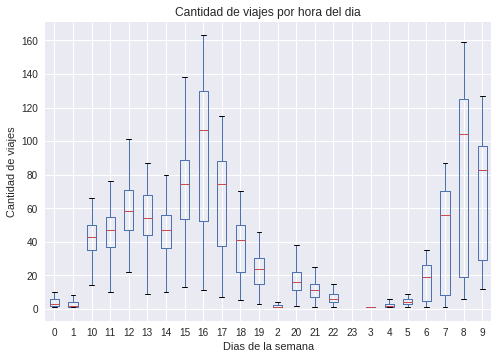

In [18]:
aux = {}
c = 0
horas = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '15', '16', '17',
             '18', '19', '20', '21','22','23']
for hora in horas:
    aux[hora] = trips[trips['hour'] == c].groupby('DATE').aggregate(sum).reset_index()['trips'][:104]
    c += 1
aux = pd.DataFrame.from_dict(aux, orient='columns')
aux.plot.box()
plt.title('Cantidad de viajes por hora del dia')
plt.xlabel('Dias de la semana')
plt.ylabel('Cantidad de viajes')
plt.show()

In [ ]:
Grafico: cantidad de viajes por cada dia del set

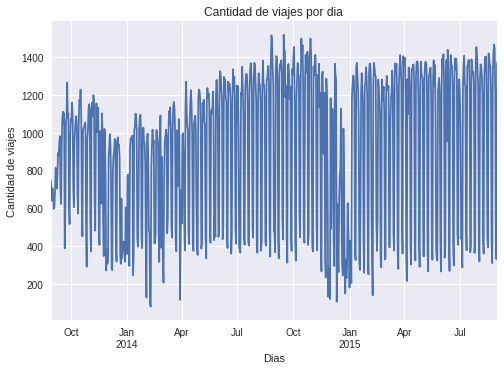

In [32]:
trips_por_dia = trips.groupby('DATE').aggregate(sum)
trips_por_dia['trips'].plot()
plt.title('Cantidad de viajes por dia')
plt.xlabel('Dias')
plt.ylabel('Cantidad de viajes')
plt.show()

Grafico Heatmap: viajes por hora en cada dia de semana

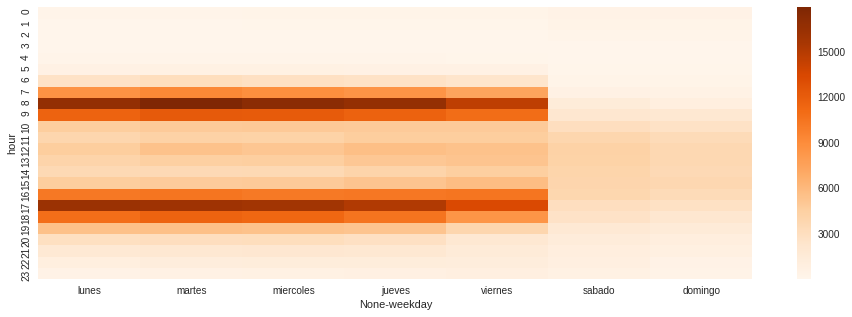

In [36]:
trips3 = trips [["hour",'weekday','trips']]
trips2 = trips3.pivot_table(index = 'hour',columns = 'weekday',aggfunc=sum )
fig, ax = plt.subplots(figsize=(16,5))       # Sample figsize in inches
sns.heatmap(trips2,cmap='Oranges', xticklabels = dias)
sns.plt.show()

In [ ]:
Grafico heatmap: Las 10 estaciones de inicio mas frecuentes por hora

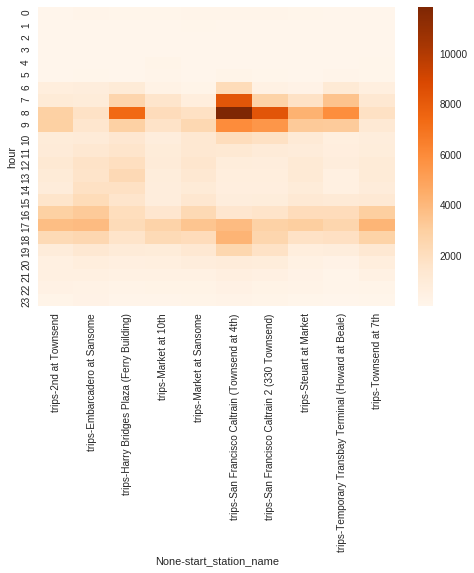

In [37]:
def calcular_top_estaciones_inicio(cantidad_de_estaciones):
    cantidad_de_starts = trips[["start_station_name", "trips"]]
    cantidad_de_starts = cantidad_de_starts.groupby("start_station_name").count()
    ranking = cantidad_de_starts.sort_values(by="trips", ascending=False)[:cantidad_de_estaciones]
    return ranking
   
cantidad_de_estaciones=10
lista_top = []
top_estaciones = calcular_top_estaciones_inicio(cantidad_de_estaciones).reset_index()['start_station_name']
lista_top = []
top_estaciones.apply(lambda x: lista_top.append(x))
trips3 = trips[["hour", 'start_station_name', 'trips']]
trips3 = trips3[trips3.start_station_name.isin(lista_top)]
trips2 = trips3.pivot_table(index='hour', columns='start_station_name', aggfunc=sum)
sns.heatmap(trips2, cmap='Oranges')
sns.plt.show()

Grafico de barras: Ranking 20 recorridos mas frecuentes

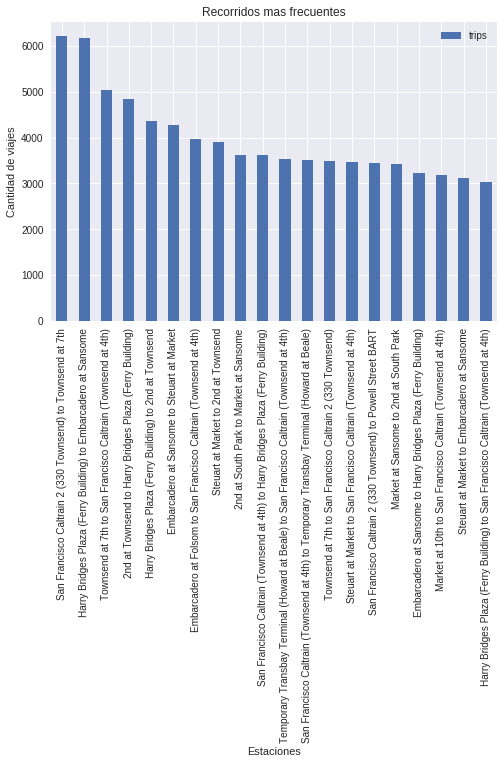

In [39]:
cantidad_de_recorridos = trips[["recorrido","trips"]]
cantidad_de_recorridos = cantidad_de_recorridos.groupby("recorrido").count()
ranking_recorridos = cantidad_de_recorridos.sort_values(by = "trips", ascending=False)[:20]
ranking_recorridos.plot(kind="bar")
plt.title('Recorridos mas frecuentes')
plt.xlabel('Estaciones')
plt.ylabel('Cantidad de viajes')
plt.show()

Grafico de Barras: Cantidad de viajes segun el tipo de subscripcion (Suscripto No subscripto)     
    

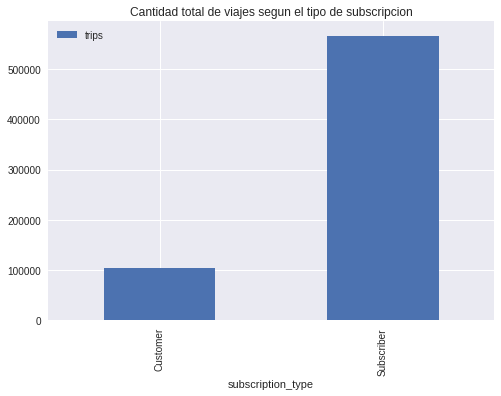

In [24]:
gruped = trips[["subscription_type","trips"]].groupby(["subscription_type"]).count()
gruped.plot(kind = "bar", y=["trips"])
plt.title("Cantidad total de viajes segun el tipo de subscripcion")
plt.show()

Grafico de lineas: Cantidad total registrada de viajes segun el tipo de subscripcion (Suscripto No subscripto) por dia de la semana

   

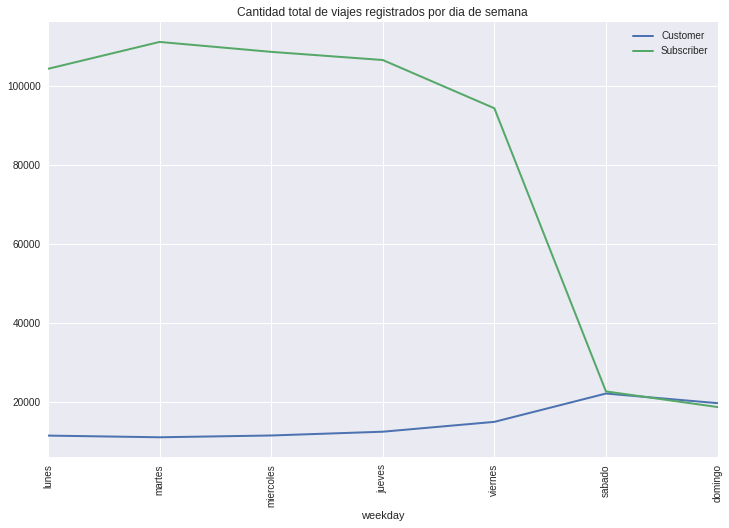

In [25]:
plt.figure()
labels=["lunes", "martes", "miercoles", "jueves", "viernes", "sabado", "domingo"]	
trips.loc[trips.subscription_type.str.contains('Customer'),\
            ['trips','weekday']].groupby('weekday').count()\
            .loc[:,'trips'].plot(rot=90,xticks=range(0,7), \
            linewidth=2,figsize=(12,8),label='Customer');
trips.loc[trips.subscription_type.str.contains('Subscriber'),\
            ['trips','weekday']].groupby('weekday').count()\
            .loc[:,'trips'].plot(rot=90,xticks=range(0,7), \
            linewidth=2,label='Subscriber');
plt.legend();
plt.title("Cantidad total de viajes registrados por dia de semana")
plt.xticks(range(0,7), labels)
plt.show();

Grafico de barras: Top 5 bicicletas mas usadas

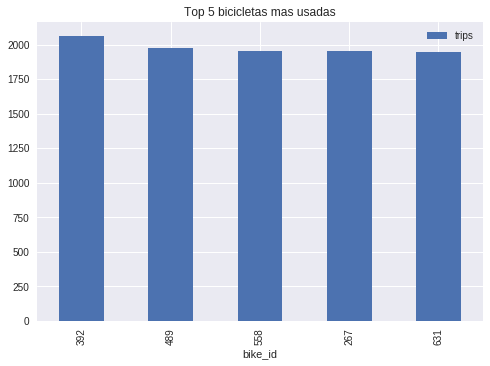

In [26]:
trips[["bike_id","trips"]].groupby(["bike_id"]).count().sort_values(by = "trips", ascending=False)[:5].plot(kind = "bar")
plt.title("Top 5 bicicletas mas usadas")
plt.show()   

Grafico de barras: Top 5 bicicletas menos usadas

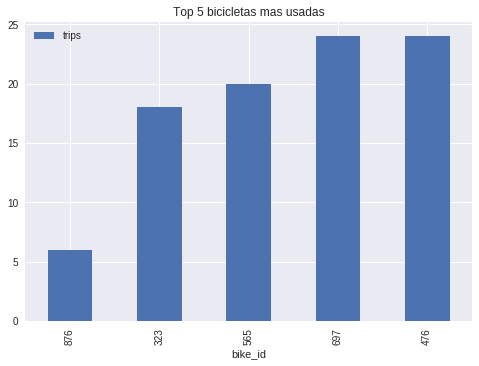

In [27]:
trips[["bike_id","trips"]].groupby(["bike_id"]).count().sort_values(by = "trips", ascending=True)[:5].plot(kind = "bar")
plt.title("Top 5 bicicletas mas usadas")
plt.show()

## Analizando el set de datos del clima

Preparamos el dataframe de weather

In [48]:
def func(x):
 if x == "Rain":
  return 2
 elif x == 'rain':
  return 2
 elif x == "Fog":
  return 1
 elif x == "Rain-Thunderstorm":
  return 0
 elif x == "Fog-Rain":
  return 3

weather["date"] = pd.to_datetime(weather.date, format="%m/%d/%Y")
weather["month"] = weather["date"].apply(lambda x: x.month)
weather["day"] = weather["date"].apply(lambda x: x.day)
weather["year"] = weather["date"].apply(lambda x: x.year)
weather['weekday'] = weather['date'].apply(lambda x: x.weekday())
weather['DATE'] = pd.to_datetime(weather[['year', 'month', 'day']], yearfirst=True)
weather["max_temperature_c"] = weather["max_temperature_f"].apply(lambda x: (x - 32) / 1.8)
weather["min_temperature_c"] = weather["min_temperature_f"].apply(lambda x: (x - 32) / 1.8)
weather["mean_temperature_c"] = weather["mean_temperature_f"].apply(lambda x: (x - 32) / 1.8)
weather["precipitation_inches"] = pd.to_numeric(weather["precipitation_inches"], errors="coerce")
weather["llueve"] = weather["events"].apply(lambda x: 0 if x != "rain" else 1)
weather["dias_lluvia"] = weather["precipitation_inches"].apply(lambda x: 1)
weather["n_events"] = weather["events"].apply(lambda x: func(x))

Grafico de barras: temperaturas promedio de dia en cada mes

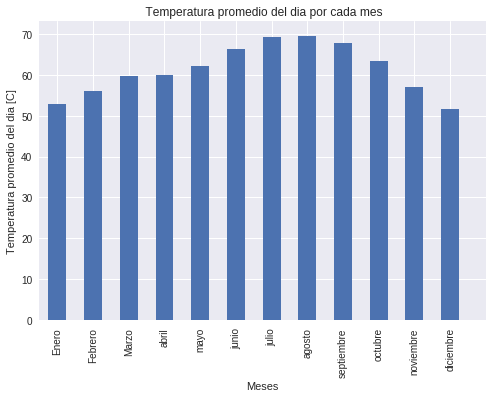

In [20]:
labels = meses
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
weatherbymonth = weather.groupby('month').mean()['mean_temperature_f']
weatherbymonth.plot(kind= 'bar')
plt.xticks(index, labels)
plt.title(" Temperatura promedio del dia por cada mes")
plt.xlabel("Meses")
plt.ylabel(' Temperatura promedio del dia [C] ')
plt.show()

Grafico de barras: cantidad de eventos meteorologicos

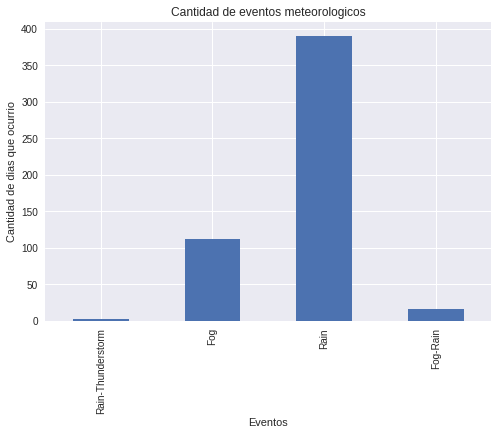

In [49]:
events = weather.groupby('n_events').aggregate(sum)['dias_lluvia']
events.plot(kind='bar')
plt.title('Cantidad de eventos meteorologicos')
index = [0, 1, 2, 3]
labels = ["Rain-Thunderstorm", "Fog", "Rain", "Fog-Rain"]
plt.xticks(index, labels)
plt.xlabel('Eventos')
plt.ylabel('Cantidad de dias que ocurrio')
plt.show()

### Analizando los viajes junto con el clima

In [ ]:
Preparamos el dataframe de trip y weather

In [33]:
def combinar_trips_weather():
    station_c = stations[['id', 'city']]
    station_c = station_c.rename(columns={'id': 'start_station_id'})
    trips_aux = trips.merge(station_c[['start_station_id', 'city']])
    cantidad_viajes_df = trips_aux[['start_date', 'city','weekday']]
    zip_code_c = []
    for ciudad in cantidad_viajes_df.city:
        if (ciudad == 'San Francisco'):
            zip_code_c.append([94107])
        if (ciudad == 'Redwood City'):
            zip_code_c.append([94063])
        if (ciudad == 'Palo Alto'):
            zip_code_c.append([94301])
        if (ciudad == 'Mountain View'):
            zip_code_c.append([94041])
        if (ciudad == 'San Jose'):
            zip_code_c.append([95113])

    zip_code_c_df = pd.DataFrame(zip_code_c, columns={'zip_code'})
    cantidad_viajes_df = pd.concat([cantidad_viajes_df, zip_code_c_df], axis=1)
    cantidad_viajes_df = cantidad_viajes_df[['start_date', 'zip_code','weekday']]
    cantidad_viajes_df.insert(3, 'cantidad', 1)
    cantidad_viajes_df = cantidad_viajes_df.groupby(['start_date', 'zip_code']).aggregate(
        sum).reset_index()
    cantidad_viajes_df.start_date = pd.to_datetime(cantidad_viajes_df.start_date)
    cantidad_viajes_df = cantidad_viajes_df.rename(columns={'start_date': 'date'})
    weather_aux = weather
    weather_aux.date = pd.to_datetime(weather_aux.date)
    weather_aux = weather[['date', "max_temperature_c", "min_temperature_c",'zip_code']]
    resultado = pd.merge(weather_aux, cantidad_viajes_df)
    return resultado

In [ ]:
Grafico: 